<a href="https://colab.research.google.com/github/ebertorres/SIMULACION/blob/main/2_1_Generaci%C3%B3n_de_n%C3%BAmeros_pseudoaleatorios_uniformemente_distribuidos_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Números aleatorios

El núcleo de un estudio de simulación es la capacidad de generar números aleatorios que representan el valor de una variable aleatoria distribuida uniformemente en $(0,1)$.

En un inicio, los números aleatorios se generaban de forma manual o mecánica, utilizando técnicas como ruedas giratorias, lanzamientos de datos o barajas; pero en el planteamiento moderno consiste en utilizar una computadora para generar de manera sucesiva números pseudoaleatorios que son una sucesión de valores que, aunque producidos de manera determinista, tienen toda la apariencia de ser variables aleatorias uniformes e independientes en $(0,1)$.

## Método congruencial multiplicativo

El **método congruencial multiplicativo** es uno de los métodos más comunes para generar números pseudoaleatorios.

Comienza con un valor inicial $x_0$ llamado *semilla*, y luego se calcula de manera recursiva los valores sucesivos $x_n$, con $n\geq 1$, haciendo

$$x_n \equiv a\cdot x_{n-1} mod \left(m\right), a,m \in \mathbb Z^{+}$$

Cada $x_n$ es $0,1,\ldots ,m-1$ y la cantidad $\frac{x_n}{m} = u_n$, llamada **número pseudoaleatorio**, se considera como una aproximación del valor de una variable aleatoria uniforme en $\left(0,1\right)$.

Como cada uno de los números $x_n$, asume uno de los valores desde $0,1,\ldots ,m-1$, se tiene que después de cierto número finito (a lo más $m$) de valores generados, alguno debe repetirse, y una vez que esto ocurre, toda la sucesión comienza a repetirse.

Así, queremos encontrar las constantes $a$ y $m$ tales que para cualquier semilla $x_0$, el número de variables que se puedan generar antes de que suceda esta repetición, sea «grande».

En general, las constantes $a$ y $m$ deben satisfacer tres criterios.

1. Para cualquier semilla inicial, $x_0$, la sucesión resultante tiene la «apariencia» de ser una sucesión de variables aleatorias independientes y uniformes en $\left(0,1\right)$.

2. Para cualquier semilla inicial, $x_0$, el número de variables que se pueden generar antes de que comience la repetición es grande.

3. Los valores se pueden calcular de manera eficiente en una computadora.

Un criterio que ayuda a determinar el valor de $m$ es tomar un primo lo suficientemente grande.

**EJEMPLO**

Generar $5,000$ números pseudoaleatorios a partir del generador congruencial multiplicativo.

$$x_n \equiv 171\cdot x_{n-1} mod \left(30269 \right)$$

$$u_n = \frac{x_n}{30269}$$

Con $x_0 = 27218$.

In [1]:
# Definimos la semilla, la constante a y m.

x_0 = 27_218; a = 171; m = 30_269

# Definimos una lista donde el unico dato sea la semilla

x = [x_0]

# Definimos un ciclo donde podamos ir generando cada x_n, en este caso con 50 iteraciones
# pues deseamos 50 numeros pseudoaleatorios. Los agregamos a la lista.

for i in range (5_000):
  x_n = (a * x[-1]) % m 
  x.append(x_n)

# Definimos una lista que contenga cada uno de los numeros pseudoaleatorios

Num_Pseudoaleatorios = [x[j]/m for j in range(len(x))]

In [9]:
import pandas as pd
import numpy as np

Num_Pseudoaleatorios

[0.8992038058739965,
 0.7638508044534011,
 0.6184875615316,
 0.7613730219035978,
 0.19478674551521358,
 0.308533483101523,
 0.7592256103604348,
 0.8275793716343454,
 0.5160725494730583,
 0.2484059598929598,
 0.47741914169612476,
 0.6386732300373319,
 0.21312233638375896,
 0.44391952162278236,
 0.9102381974957877,
 0.6507317717797086,
 0.2751329743301728,
 0.04773861045954607,
 0.163302388582378,
 0.9247084475866398,
 0.1251445373154052,
 0.3997158809342892,
 0.35141563976345436,
 0.09207439955069543,
 0.7447223231689187,
 0.34751726188509696,
 0.4254517823515808,
 0.7522547821203212,
 0.6355677425749117,
 0.682083980309888,
 0.6363606329908488,
 0.8176682414351316,
 0.8212692854075127,
 0.43704780468466087,
 0.7351746010770095,
 0.7148567841686213,
 0.24051009283425287,
 0.12722587465724008,
 0.7556245663880538,
 0.21180085235719714,
 0.21794575308070963,
 0.2687237768013479,
 0.9517658330304932,
 0.7519574482143447,
 0.5847236446529452,
 0.9877432356536391,
 0.9040932967722752,
 0.599

Observamos la distribución de los datos

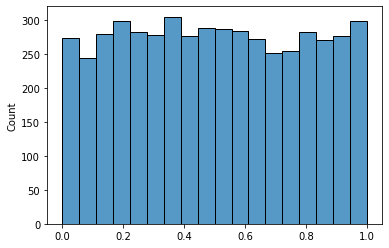

In [8]:
import seaborn as sns
sns.histplot(Num_Pseudoaleatorios)

**ACTIVIDAD**

Defina una función que dado un cierto valor de $x_0$, $a$ y $m$, verificando que $m$ sea primo, me genere una lista con $n$ números pseudoaleatorios distribuidos uniformemente entre $(0,1)$.

In [11]:
def metiodo_congruacial_multiplicativo(x0,a,m,n):
  def primo (k):
    for j in range (2,k):
      if k % j == 0:
        return False
    return True
  if primo (m)==True:
    lista = [x0]
    for it in range (n):
      lista.append((a*lista[-1])% m)
    return [lista[b]/ m for b in range(len(lista))]
  else:
    print("el valor", m , "no es primo")

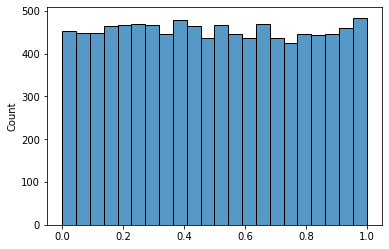

In [13]:
sns.histplot(metiodo_congruacial_multiplicativo(x0=27_218,
                                                a=171,
                                                m=30_269,
                                                n=10_000))

## Evaluación de Integrales

Considere la función $g(x)$ y supongamos que deseamos calcular el valor de $\theta$, donde $\theta$ está definido como

$$\int_0^1g(x)\cdot dx = \theta$$

Considere el siguiente teorema

**Teorema**

Si $X$ es una variable aleatoria continua con función de densidad de probabilidad $f(x)$, entonces

$$E[h(X)] = \int_{-∞}^{∞}h(x)f(x)\cdot dx$$

De aquí considere que la función de densidad de probabilidad de una variable aleatoria distribuida uniformemente continua $X$ en $(a,b)$ es $f_{X}(x)=\frac{1}{b-a}$, por lo tanto si considera $u\sim U(0,1)$ tenemos que su función de densidad de probabilidad es $f_{u}(x) = 1$.

Por lo tanto, considere $u\sim U(0,1)$, con ello expresamos $\theta$ de la siguiente manera

$$E[g(u)] = \theta$$

Ahora considere $u_1,\ldots,u_k\sim U(0,1)$, esto implica que $g(u_1),\ldots,g(u_k)$ son variables aleatorias independientes e idénticamente distribuidas con media $\theta$.

**Teorema (La ley débil de los grandes números)**

Sea $X_1,\ldots,X_n$ una sucesión de variables aleatorias independientes e idénticamente distribuidas con media $\mu$. Entonces, para todo $ɛ > 0$

$$P\left\{\left|\frac{X_1+\cdots +X_n}{n} - \mu \right| > ɛ \right\} \to 0, n\to ∞$$

**Corolario (Ley fuerte de los grandes números)**

$$\lim_{n\to ∞}\frac{X_1+\cdots+X_n}{n} = \mu$$

Por lo tanto, como $g(u_1),\ldots,g(u_k)$ son variables aleatorias independientes e idénticamente distribuidas con media $\theta$ y bajo la Ley fuerte de los grandes números tenemos que 

$$\sum_{i = 1}^k\frac{g(u_i)}{k}\to E[g(u)] = \int_0^1g(x)\cdot dx = \theta,\: \: k\to ∞$$

Así, podemos aproximar el valor de $\theta$ generando un número grande de números pseudoaleatorios $u_i\sim U(0,1)$, evaluandolos en $g$ y calculando su promedio lo cual nos acercará, por la Ley fuerte de los grandes números, a su esperanza que es igual a $\theta$.

Este método es el llamado **Monte Carlo**.

**EJEMPLO**

Aproximemos el valor de la siguiente integral

$$\int_0^1\sqrt{x^2 + 1}\cdot dx$$

In [17]:
# Definimos una funcion en Python para la cual evaluamos los numeros pseudoaleatorios
# Generamos una cantidad grande de numeros pseudoaleatorios U(0,1), cada uno lo evaluamos en g y luego calculamos el promedio de las evaluaciones

from random import uniform
from statistics import mean

mean(list(map( lambda x : (x**2 + 1)**(1/2) , list(uniform(0,1) for _ in range (9_000)) ))) #funcion anonima regresa:calcula recordar el colorario ley de los grandes numeros 

1.1473800881357044

Compruebe este valor aproximado mediante una calculadora on-line

Entre más aumentamos el número de números pseudoaleatorios distribuidos uniformemente entre 0 y 1 tenemos que más se aproxima al valor real, como demuestra la Ley fuerte de los grandes números.

In [18]:
import matplotlib.pyplot as plt

In [20]:
for k in range (1,10_000):
  plt.plot([k],
           [mean(list(map( lambda x : (x**2 + 1)**(1/2) , list(uniform(0,1) for _ in range (k)) )))],
           'o')
plt.tight_layout()

Error in callback <function flush_figures at 0x7fd5d4893e50> (for post_execute):


KeyboardInterrupt: ignored

**ACTIVIDAD**

Defina una función que dada cualquier función $f$ solicitada te regrese una aproximación de la integral

$$\int_0^1f(x)\cdot dx$$

In [45]:
def valor(p):
 mean(list(map( lambda x : p , list(uniform(0,1) for _ in range (9_000)) ))) #funcion anonima regresa:calcula recordar el colorario ley de los grandes numeros 

In [46]:
v=valor(x-1)
v

TypeError: ignored

Compruebe su función computacional con al menos dos funciones $f,g$.

Si deseamos calcular 

$$\int_a^bg(x)\cdot dx = \theta,\: \:  a,b\in \mathbb R$$

Entonces hay que hacer la sistitución

$$y = \frac{x-a}{b-a}$$

Donde note que $x = y\cdot (b-a) + a$ resultando en $dx = dy\cdot (b-a)$

Cuando $x = a$ sucede que $y = 0$, cuando $x = b$ sucede que $y = 1$

$$\implies \int_a^bg(x)\cdot dx = \int_0^1g( y\cdot (b-a) + a )\cdot(b-a)\cdot dy$$

Hacemos $h(y) = g( y\cdot (b-a) + a )\cdot(b-a)$

$$\implies \int_a^bg(x)\cdot dx = \int_0^1g( y\cdot (b-a) + a )\cdot(b-a)\cdot dy = \int_0^1h(y)\cdot dy$$

**ACTIVIDAD**

Defina una función que dada cualquier función $f$, el límite inferior $a$ y el límite superior $b$ te regrese el valor aproximado de la integral

$$\int_a^bf(x)\cdot dx,\: \: a,b\in \mathbb R$$

Compruebe su función con las siguientes integrales

$$\int_{\pi}^{\pi + 1}\cos(x)\cdot dx$$

$$\int_{10}^{15}x\cdot e^x\cdot dx$$

$$\int_{-\pi}^e\sin(x)\cdot dx$$

Si deseamos calcular el valor de $\theta$ en 

$$\int_0^{∞}g(x)\cdot dx$$

Podríamos aplicar la sustitución $y = \frac{1}{x+1}$ donde $dy = \frac{-dx}{(x+1)^2}$ así tenemos que

$$\int_0^1h(y)\cdot dy,\: \: h(y) = \frac{g\left(\frac{1}{y}-1\right)}{y^2}$$

**EJEMPLO**

Aproxime el valor de la siguiente integral

$$\int_0^{∞}e^{\frac{-x}{3}}dx$$

In [ ]:
def integral_0_infty (f,lenght_random_list):
  from random import uniform
  from statistics import mean
  return mean(list(map(lambda u : f( (1/u) - 1 )/(u**2),list( uniform(0,1) for _ in range(lenght_random_list) ))))

In [ ]:
from math import e as e_value
integral_0_infty( f = lambda x : e_value**(-x/3), lenght_random_list = 1_000 )

**Tarea**

Supongamos que $g : \mathbb R^n \to \mathbb R$, y que queremos calcular

$$\int_0^1 \int_0^1 \ldots \int_0^1 g(x_1,\ldots,x_n)\cdot dx_1\cdot dx_2\cdot \cdots \cdot dx_n$$

La clave del Método Monte Carlo para estimar $\theta$ está en el hecho de que $\theta$ se puede expresar mediante la siguiente esperanza

$$E[g(u_1,\ldots,u_n)] = \theta$$

Donde $u_1,\ldots,u_n \sim U(0,1)$. Por tanto, si generamos $k$ conjuntos independientes, cada uno formado por $n$ variables independientes y distribuidas $U(0,1)$

$$u_1^1,\ldots ,u_n^1$$

$$u_1^2,\ldots ,u_n^2$$

$$\vdots$$

$$u_1^k,\ldots ,u_n^k$$

La nomeclatura anterior es $u_i^j$, con $i$ el $i$-ésimo elemento del conjunto $j$-ésimo.

Entonces, como las variables aleatorias $g(u_1^i,\ldots,u_n^i),i = 1,\ldots,k$, son todas variables aleatorias independientes e idénticamente distribuidas con media $\theta$, podemos estimar, gracias a la Ley fuerte de los grandes números, el valor de $\theta$ mediante

$$\sum_{i = 1}^{k}\frac{g\left( u_1^i,\ldots,u_n^i \right)}{k}$$

En equipos diseñen un código en lenguaje de programación que aproxime el valor de las siguientes integrales.

1. $$\int_0^1\int_0^1x^2y\cdot dx\cdot dy$$
2. $$\int_0^1\int_0^1(e^x + x)y\cdot dy \cdot dx$$
3. $$\int_e^{e+1}\int_{\pi}^{\pi + 1}\int_{-\pi}^e\sin(x)\cos(y)e^z\cdot dx\cdot dy\cdot dz$$